In [84]:
import pandas as pd
import os
import numpy as np
import shapely as sp

import matplotlib.pyplot as plt

In [10]:
#check wd
print(os.getcwd())

#change wd
os.chdir("/Users/anayahall/projects/grapevine")

#read in compost facilities csv
df = pd.read_csv("data/swis_compost.csv")

/Users/anayahall/projects/grapevine


In [11]:
df.columns
#df.head()
#df.tail()
#df.info()

Index(['SwisNo', 'Name', 'County', 'Location', 'Place', 'Latitude',
       'Longitude', 'Category', 'Activity', 'OperationalStatus',
       'AcceptedWaste', 'Throughput', 'ThroughputUnits', 'Capacity',
       'CapacityUnits', 'Acreage', 'RemainingCapacity'],
      dtype='object')

In [12]:
df.County.value_counts(dropna=False).head()

Riverside         10
Tulare            10
San Bernardino    10
Los Angeles        9
Napa               6
Name: County, dtype: int64

In [13]:
df['CapacityUnits'].value_counts(dropna=False)

Tons/year         61
Cu Yards/year     31
Cubic Yards       10
NaN               10
Tons               3
Tons/day           2
Tires/day          1
Cu Yards/month     1
Name: CapacityUnits, dtype: int64

In [24]:
# Identify and recode oddly labeled capacity units (those lacking time unit)
df[df.CapacityUnits=="Tons"]

n = len(df.index)
for i in range(n):
#     print("index: ", i)
    if df.SwisNo[i] == "13-AA-0095": 
        df.at[i, 'CapacityUnits'] = "Tons/year"
    if df.SwisNo[i]=="49-AA-0422": 
        df.at[i, 'CapacityUnits'] = "Tons/year"
    if df.SwisNo[i]=="36-AA-0456": 
        df.at[i, 'CapacityUnits'] = "Tons/year"
        
foo = df[df.CapacityUnits=="Tons/Year"]
print('foo', foo)

foo Empty DataFrame
Columns: [level_0, index, SwisNo, Name, County, Location, Place, Latitude, Longitude, Category, Activity, OperationalStatus, AcceptedWaste, Throughput, ThroughputUnits, Capacity, CapacityUnits, Acreage, RemainingCapacity, cap_m3]
Index: []


In [25]:


df[df.CapacityUnits=="Cubic Yards"]


# n = len(df.index)
# for i in range(n):
#     print("index: ", i)
#     if df.SwisNo[i]=="12-AA-0113": 
#         df.CapacityUnits[i]="Cu Yards/year"
#     if df.SwisNo[i]=="44-AA-0013": 
#         df.CapacityUnits[i]="Cu Yards/month"
#     if df.SwisNo[i]=="37-AA-0992": 
#          df.CapacityUnits="Cu Yards/year"
        



,level_0,index,SwisNo,Name,County,Location,Place,Latitude,Longitude,Category,Activity,OperationalStatus,AcceptedWaste,Throughput,ThroughputUnits,Capacity,CapacityUnits,Acreage,RemainingCapacity,cap_m3
4,4,4,28-AA-0002,Clover Flat Resource Recovery Park,Napa,4380 Silverado Trail Road,Calistoga,38.58400,-122.53400,Composting,Composting Facility (Other),Active,"Food Wastes,Green Materials",2500.0,Cubic Yards,2500.0,Cubic Yards,NaN,NaN,default
5,5,5,12-AA-0113,Eel River Transportation & Salvage,Humboldt,850 River Walk Drive,Fortuna,40.58444,-124.15417,Composting,Composting Operation (Green Waste),Active,"Agricultural,Green Materials,Wood waste",500.0,Cu Yards/day,50000.0,Cubic Yards,0.5,NaN,default
6,6,6,37-AB-0011,Miramar Wholesale Nursery,San Diego,5400 Governor Drive,San Diego,32.86220,-117.18050,Composting,Composting Operation (Green Waste),Closed,Green Materials,50.0,Tons/day,10000.0,Cubic Yards,100.0,NaN,default
7,7,7,28-AA-0037,Joseph Phelps Vineyards,Napa,200 Taplin Road,Saint Helena,38.50202,-122.42783,Composting,Composting Operation (Ag),Active,"Green Materials,Manure",100.0,Cu Yards/day,2000.0,Cubic Yards,NaN,NaN,default
24,24,27,43-AA-0015,Z-Best Composting Facility,Santa Clara,980 State Hwy. 25,Gilroy,36.94889,-121.52111,Composting,Composting Facility (Mixed),Active,"Agricultural,Food Wastes,Green Materials,Manur...",1500.0,Tons/day,576000.0,Cubic Yards,105.0,NaN,default
26,26,29,19-AR-1226,Van Norman Chipping and Grinding Fac,Los Angeles,11701 Blucher Ave,Granada Hills (In Los Angeles),34.28889,-118.48028,Composting,Chipping and Grinding Activity Fac./ Op.,Active,Green Materials,499.0,Cubic Yards,78000.0,Cubic Yards,7.0,NaN,default
43,43,50,44-AA-0013,Rodoni Farms Agricultural Composting Op.,Santa Cruz,395 Dimeo Lane,Santa Cruz,36.97010,-122.10660,Composting,Composting Operation (Ag),Active,"Agricultural,Green Materials",500.0,Cu Yards/day,6000.0,Cubic Yards,5.0,NaN,default
87,87,96,11-AA-0039,California Olive Ranch Compost Facility,Glenn,5945 County Rd. 35,Artois,39.60643,-122.26492,Composting,Composting Facility (Other),Planned,"Agricultural,Food Wastes,Green Materials,Manur...",1660.0,Tons/day,198000.0,Cubic Yards,30.0,NaN,default
91,91,100,37-AA-0992,Evergreen Nursery Blossom Valley,San Diego,9708 Flinn Springs Rd.,El Cajon,32.85617,-116.85874,Composting,Composting Operation (Green Waste),Active,Green Materials,200.0,Cu Yards/day,10000.0,Cubic Yards,1.5,NaN,default
93,93,102,54-AA-0059,Hofstee Farms,Tulare,16029 Ave. 139,Tipton,36.15457,-119.25539,Composting,Composting Operation (Ag),Active,"Agricultural,Manure",9500.0,Cubic Yards,9500.0,Cubic Yards,7.0,NaN,default


In [17]:
# first filter out all th
df = df[df['Capacity'].notnull()]

df.reset_index(inplace=True)

df['cap_m3'] = 'default'

#print("df: ", len(df.index))
print("df index length: ", len(df.index))

df.tail()


df index length:  109


,level_0,index,SwisNo,Name,County,Location,Place,Latitude,Longitude,Category,Activity,OperationalStatus,AcceptedWaste,Throughput,ThroughputUnits,Capacity,CapacityUnits,Acreage,RemainingCapacity,cap_m3
104,104,114,35-AA-0032,Central Coast Compost LLC,San Benito,1206 Shore Rd.,Hollister,36.95164,-121.43727,Composting,Composting Operation (Ag),Active,"Agricultural,Manure",12000.0,Tons/year,12000.0,Tons/year,15.0,NaN,default
105,105,115,54-AA-0062,Slover Bros Trucking Inc.,Tulare,24861 Road 148,Tulare,36.23989,-119.24262,Composting,Composting Operation (Ag),Active,"Agricultural,Manure",500.0,Tons/day,30000.0,Tons/year,10.0,NaN,default
106,106,116,54-AA-0063,Slover Bros Trucking Inc.,Tulare,North of Ave. 248 East Side of Road 148,Tulare,36.24034,-119.24284,Composting,Composting Operation (Ag),Active,Manure,500.0,Tons/day,30000.0,Tons/year,5.0,NaN,default
107,107,117,54-AA-0064,Slover Bros Trucking Inc.,Tulare,South of Ave 256 on Road 148,Tulare,36.24113,-119.24308,Composting,Composting Operation (Ag),Active,Manure,5000.0,Tons/day,30000.0,Tons/year,5.0,NaN,default
108,108,118,33-AA-0370,Rios Recycling C&D Wood Chip & Grind,Riverside,5190 Wilson Ave,Riverside,34.01879,-117.37271,Composting,Chipping and Grinding Activity Fac./ Op.,Active,"Construction/demolition,Green Materials,Wood w...",200.0,Tons/day,62040.0,Tons/year,3.2,NaN,default


In [18]:
# write function to convert all capacity units into cubic meters/month!

n = len(df.index)
for i in range(n):
    print("index: ", i)
    if df.CapacityUnits[i] == "Tons/year":
        print("tons/year")
        # tons/year * cu yards/ton * cu meters/cu yards * years/month 
        df.cap_m3[i] = df.Capacity[i] * 2.24 * 0.764555 * (1/12)
        print(df.cap_m3[i])
    elif df.CapacityUnits[i] == "Cu Yards/year":
        print("cu yrds/year")
        # cu yards/year * cu meters/cu yards * years/month 
        df.cap_m3[i] = df.Capacity[i] * 0.764555 * (1/12)
        print(df.cap_m3[i])
    elif df.CapacityUnits[i] == "Cubic Yards":
        print("cu yrds- wtf is this********")
        print(df.cap_m3[i])
    elif df.CapacityUnits[i] == "Tons":
        print("tons- wtf is this********")
        print(df.cap_m3[i])
    elif df.CapacityUnits[i] == "Tons/day":
        # tons/day * cu yards/ton * cu meters/cu yards * days/year * years/month 
        df.cap_m3[i] = df.Capacity[i] * 2.24 * 0.764555 * (365/1) * (1/12)
        print("tons/day")
        print(df.cap_m3[i])
    elif df.CapacityUnits[i] == "Cu Yards/month":
        # cu yards/month * cu meters/cu yards 
        df.cap_m3[i] = df.Capacity[i] * 0.764555
        print("cu yrds/month")
        print(df.cap_m3[i])
    elif df.CapacityUnits[i] == "Tires/day":
        print("tires/day - delete these?")
        print(df.cap_m3[i])
    else:
        print("poop")


# will also need a function to convert waste volume into compost volume

index:  0
tons/year
8901.11241507
index:  1
cu yrds/year
2548.51666667
index:  2
cu yrds/year
637.129166667
index:  3
tons/year
2818.65943333
index:  4
cu yrds- wtf is this********
default
index:  5
cu yrds- wtf is this********
default
index:  6
cu yrds- wtf is this********
default
index:  7
cu yrds- wtf is this********
default
index:  8
tons/year
799.214826667
index: 

/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 9
tons/year
3710.64026667
index:  10
tons/year
4566.94186667
index:  11
cu yrds/year
764.555
index:  12
tons/year
8905.53664
index:  13
tons/year
8848.44986667
index:  14
tons/year
107.0377
index:  15
cu yrds/year
637.129166667
index:  16
tons/year
291.142544
index:  17
tons/day
26045.8403333
index:  18
tons/year
8848.44986667
index:  19
cu yrds/year
6973.37872917


/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


index:  20
tons/year
856.3016
index:  21
cu yrds/year
9.5569375
index:  22
tons/year
713.584666667
index:  23
tons/year
7135.84666667
index:  24
cu yrds- wtf is this********
default
index:  25
tons/year
6422.262
index:  26
cu yrds- wtf is this********
default
index:  27
tons/year
4081.70429333
index:  28
cu yrds/year
63.7129166667
index:  29
tons/year
4638.30033333
index:  30
tons/year
428.1508
index:  31
cu yrds/year
3313.07166667
index:  32
tires/day - delete these?
default
index:  33
cu yrds/year
4459.90416667
index:  34
cu yrds/year
4013.59518542
index:  35
cu yrds/year
3968.99614375
index:  36
cu yrds/year
3968.99614375
index:  37
tons/year
256.89048
index:  38
cu yrds/year
63.7129166667
index:  39
cu yrds/year
4587.33
index:  40
tons/year
371.064026667
index:  41
cu yrds/year
509.703333333
index:  42
tons/year
5708.67733333
index:  43
cu yrds- wtf is this********
default
index:  44
tons/year
8934.08002667
index:  45
tons/year
10418.3361333
index:  46
cu yrds/year
5734.1625
index:

/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1141.73546667
index:  54
tons/year
2854.33866667
index:  55
tons/year
4995.09266667
index:  56
tons/year
6422.262
index:  57
tons/year
3567.92333333
index:  58
cu yrds/year
1720.24875
index:  59
tons/year
8905.53664
index:  60
tons/year
2226.38416
index:  61
tons/year
1141.73546667
index:  62
tons/year
1427.16933333
index:  63
tons/year
3781.99873333
index:  64
tons/year
2140.754
index:  65
tons/year
8848.44986667
index:  66
cu yrds/year
3185.64583333
index:  67
tons/year
9990.18533333
index:  68
tons/year
5708.67733333
index:  69
tons/year
2140.754
index:  70
cu yrds/year
700.842083333
index:  71
cu yrds/year
1360.27077083
index:  72
cu yrds/year
6116.44
index:  73
cu yrds/year
637.129166667
index:  74
tons/year
1027.56192
index:  75
cu yrds/year
4778.46875
index:  76
cu yrds/year
38.22775
index:  77
cu yrds/year
891.980833333
index:  78
tons/year
3154.04422667
index:  79
tons/year
1302.29201667
index:  80
tons/year
3710.64026667
index:  81
tons/year
8563.016
index:  82
tons/year
2611

In [19]:
range(n)

# type(df.iloc[10,14])

# print(df.loc[9,'CapacityUnits'])

print(df.index)

RangeIndex(start=0, stop=109, step=1)


In [60]:
# Last thing is to make all points spatial
# try using shapely package
# from shapely.geometry import Point

# point = Point(df.Longitude[0], df.Latitude[0])

# df.points = {}

# n = len(df.index)
# for i in range(n):
#     df.points[i] = Point(df.Longitude[i], df.Latitude[i])


# df.head()
#how to assign values:
# df.at[i, 'CapacityUnits'] = "Tons/year"


In [82]:
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [83]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

len(geometry)

109

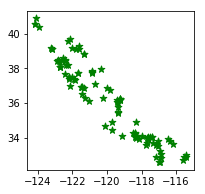

In [86]:
%matplotlib inline
gdf.plot(marker='*', color='green', markersize=50, figsize=(3, 3))

In [87]:
df.head()

,level_0,index,SwisNo,Name,County,Location,Place,Latitude,Longitude,Category,...,AcceptedWaste,Throughput,ThroughputUnits,Capacity,CapacityUnits,Acreage,RemainingCapacity,cap_m3,points,geometry
0,0,0,01-AA-0310,Tri-Cities Rec. and Disp. CD Chip/Grind,Alameda,7010 Auto Mall Pkwy.,Fremont,37.49078,-121.99040,Transfer/Processing,...,Wood waste,200.0,Tons/month,62369.0,Tons/year,90.0,NaN,8901.11,null,POINT (-121.9904 37.49078)
1,1,1,27-AA-0090,Breien-Eade Compost Venture,Monterey,1 Pine Valley Road,San Ardo,36.12481,-121.00886,Composting,...,"Agricultural,Manure",40000.0,Cu Yards/year,40000.0,Cu Yards/year,480.0,NaN,2548.52,null,POINT (-121.00886 36.12481)
2,2,2,30-AB-0378,Golden Rain Foundation Composting Op.,Orange,24401 Moulton Parkway,Laguna Hills,33.60377,-117.72490,Composting,...,Green Materials,20.0,Tons/day,10000.0,Cu Yards/year,3.0,NaN,637.129,null,POINT (-117.7249 33.60377)
3,3,3,19-AR-5584,Dept. of Rec. & Parks Greenwaste Rec.,Los Angeles,5400 Griffith Park Dr,Los Angeles (City),34.11722,-118.27222,Composting,...,Green Materials,50.0,Tons/day,19750.0,Tons/year,3.0,NaN,2818.66,null,POINT (-118.27222 34.11722)
4,4,4,28-AA-0002,Clover Flat Resource Recovery Park,Napa,4380 Silverado Trail Road,Calistoga,38.58400,-122.53400,Composting,...,"Food Wastes,Green Materials",2500.0,Cubic Yards,2500.0,Cubic Yards,NaN,NaN,default,null,POINT (-122.534 38.584)
